<a href="https://colab.research.google.com/github/nramelia2/MACHINE-LEARNING/blob/main/WEEK%208_Support%20Vector%20Machines/Support_Vector_Regression_(SVR)_using_linear_and_non_linear_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [4]:
# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’.
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

C : float, default=1.0.
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

gamma : {‘scale’, ‘auto’} or float, default=’scale’.
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

a) if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

b) if ‘auto’, uses 1 / n_features.

degreeint, default=3.
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

epsilonfloat, default=0.1.
Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

coef0float, default=0.0.
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

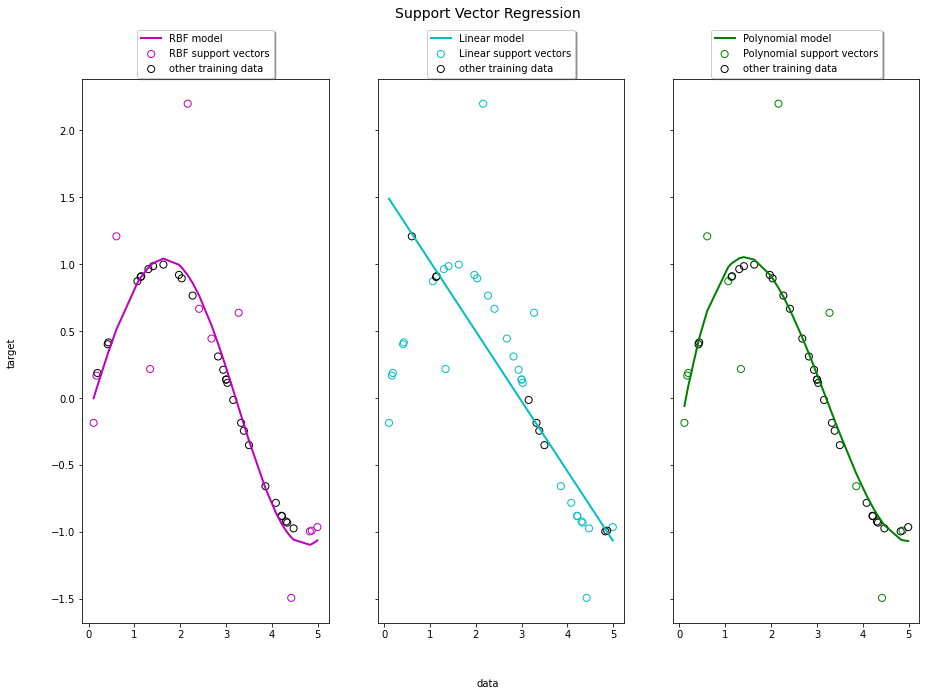

In [6]:
# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False.
Controls sharing of properties among x (sharex) or y (sharey) axes:

a) True or 'all': x- or y-axis will be shared among all subplots.

b) False or 'none': each subplot x- or y-axis will be independent.

c) 'row': each subplot row will share an x- or y-axis.

d) 'col': each subplot column will share an x- or y-axis.

When subplots have a shared x-axis along a column, only the x tick labels of the bottom subplot are created. Similarly, when subplots have a shared y-axis along a row, only the y tick labels of the first column subplot are created. To later turn other subplots' ticklabels on, use tick_params.

When subplots have a shared axis that has units, calling set_units will update each axis with the new units.

###### Reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots